# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data


## Problem description

Services like Uber and Lyft have transformed urban transportation, offering flexibility and convenience to millions of users. This project leverages a comprehensive dataset from Kaggle, featuring Uber and Lyft trip data from Boston, to uncover patterns and relationships affecting ride prices, travel times, and service availability. The primary objective is to gain actionable insights that benefit both users and service providers.

The dataset contains detailed information about Uber and Lyft rides in Boston, including attributes such as date, time, pickup and drop-off coordinates, ride costs across different service categories, weather conditions, travel distance, and the impact of traffic congestion. Using this data, the project aims to understand pricing dynamics, such as how factors like time of day, day of the week, and weather influence ride prices. It also seeks to compare Uber and Lyft services to identify differences in pricing strategies, availability, and user experience

# Dependencies loading

In [85]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import funs.helpers_1 as he
%matplotlib inline

from sklearn.model_selection import train_test_split

np.random.seed(2024)

# Data loading

In [86]:
data = pd.read_csv('../data/input/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data info

In [87]:
sum(data.id.value_counts()>1)

0

It looks like we don't have any duplicates of rides, so we can get rid of id column.

In [88]:
data=data.drop(['id'],axis=1)

## Unique values

In [89]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  object 
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  object 
 7   destination                  693071 non-null  object 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

In [90]:
data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

In [91]:
data.shape

(693071, 56)

In [92]:
data.nunique().sort_values()

timezone                           1
month                              2
cab_type                           2
uvIndex                            3
icon                               7
surge_multiplier                   7
short_summary                      9
long_summary                      11
latitude                          11
source                            12
destination                       12
longitude                         12
product_id                        13
name                              13
day                               17
moonPhase                         18
uvIndexTime                       20
temperatureHighTime               23
temperatureMaxTime                23
hour                              24
temperatureMinTime                25
windGustTime                      25
apparentTemperatureHighTime       27
apparentTemperatureMaxTime        27
precipProbability                 29
apparentTemperatureMinTime        29
temperatureLowTime                31
a

We have only 1 timezone so we can drop it.


In [93]:
data=data.drop(['timezone'],axis=1)

In [94]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

           timestamp  hour  day  month             datetime  \
5059    1.543464e+09     3   29     11  2018-11-29 03:56:07   
5334    1.543275e+09    23   26     11  2018-11-26 23:33:14   
5862    1.543316e+09    10   27     11  2018-11-27 10:45:23   
6011    1.543350e+09    20   27     11  2018-11-27 20:15:22   
6227    1.543238e+09    13   26     11  2018-11-26 13:20:09   
...              ...   ...  ...    ...                  ...   
690733  1.544958e+09    10   16     12  2018-12-16 10:55:04   
690736  1.544958e+09    10   16     12  2018-12-16 10:55:04   
691761  1.544922e+09     0   16     12  2018-12-16 00:55:05   
692491  1.543294e+09     4   27     11  2018-11-27 04:42:21   
692714  1.543441e+09    21   28     11  2018-11-28 21:38:08   

                         source              destination cab_type  \
5059          Boston University                 Back Bay     Uber   
5334              North Station                   Fenway     Uber   
5862         Financial District     

In [95]:
data.duplicated().sum()

np.int64(1046)

In [96]:
data = data.drop_duplicates()
data.shape

(692025, 55)

We got rid of duplicated rows

## Null values

In [97]:
data.isnull().sum().sort_values(ascending=False)


price                          54703
timestamp                          0
ozone                              0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
sunriseTime                        0
temperatureLow                     0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
apparentTemperatureMax             0
t

In [98]:
data  = data.dropna()


We removed null values

# Change datatypes

In [99]:
target_datatypes = {
  'categorical':['source','destination','cab_type','name','short_summary','long_summary','icon'],
  'float': [x for x in data.dtypes[data.dtypes=='float'].index.to_list() if 'time' not in x.lower()],
  'integer': [x for x in data.dtypes[data.dtypes=='int'].index.to_list() if 'time' not in x.lower()],
  'datetime':[x for x in data.columns if 'time' in x.lower()],
}

In [100]:
target_datatypes

{'categorical': ['source',
  'destination',
  'cab_type',
  'name',
  'short_summary',
  'long_summary',
  'icon'],
 'float': ['price',
  'distance',
  'surge_multiplier',
  'latitude',
  'longitude',
  'temperature',
  'apparentTemperature',
  'precipIntensity',
  'precipProbability',
  'humidity',
  'windSpeed',
  'windGust',
  'visibility',
  'temperatureHigh',
  'temperatureLow',
  'apparentTemperatureHigh',
  'apparentTemperatureLow',
  'dewPoint',
  'pressure',
  'cloudCover',
  'visibility.1',
  'ozone',
  'moonPhase',
  'precipIntensityMax',
  'temperatureMin',
  'temperatureMax',
  'apparentTemperatureMin',
  'apparentTemperatureMax'],
 'integer': ['hour', 'day', 'month', 'windBearing', 'uvIndex'],
 'datetime': ['timestamp',
  'datetime',
  'windGustTime',
  'temperatureHighTime',
  'temperatureLowTime',
  'apparentTemperatureHighTime',
  'apparentTemperatureLowTime',
  'sunriseTime',
  'sunsetTime',
  'uvIndexTime',
  'temperatureMinTime',
  'temperatureMaxTime',
  'apparentT

In [101]:
data = he._cast_data(data,target_datatypes)

Column type not defined in parameters_proces_data.yml: {'product_id'}


## Target variable

Our target variable is price.


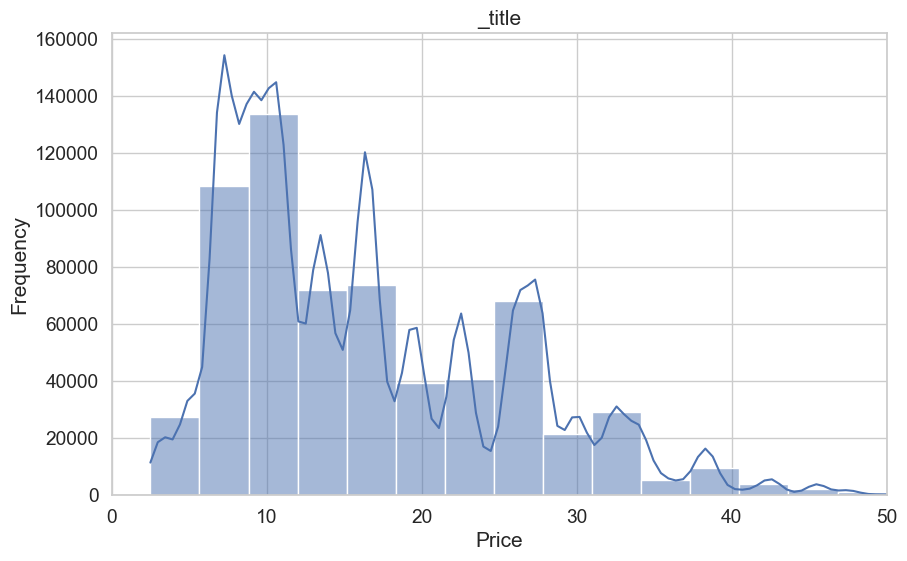

In [ ]:
# Histogram of prices
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.histplot(data['price'], bins=30, kde=True)
_title = 'Price Histogram'
plt.title('_title')
plt.xlim(0, 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [103]:
data['price'].describe()

count    637322.000000
mean         16.547041
std           9.325415
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

## Feature description

### Categorical

In [104]:
data.dtypes[data.dtypes == 'object']

product_id    object
dtype: object

In [105]:
data.describe(include=['O'])

,product_id
count,637322
unique,12
top,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
freq,55030


#### Source

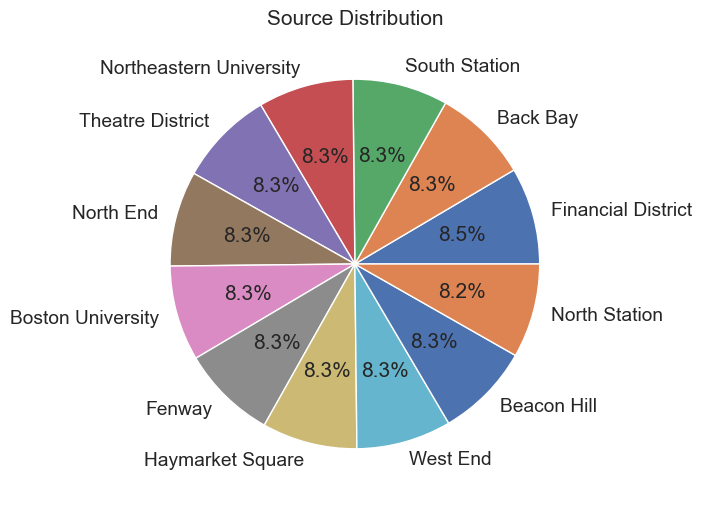

In [ ]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
_title = 'Source Distribution'
plt.title(_title)
plt.pie(data['source'].value_counts(),labels=data['source'].value_counts().index,autopct='%1.1f%%')
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Destination 

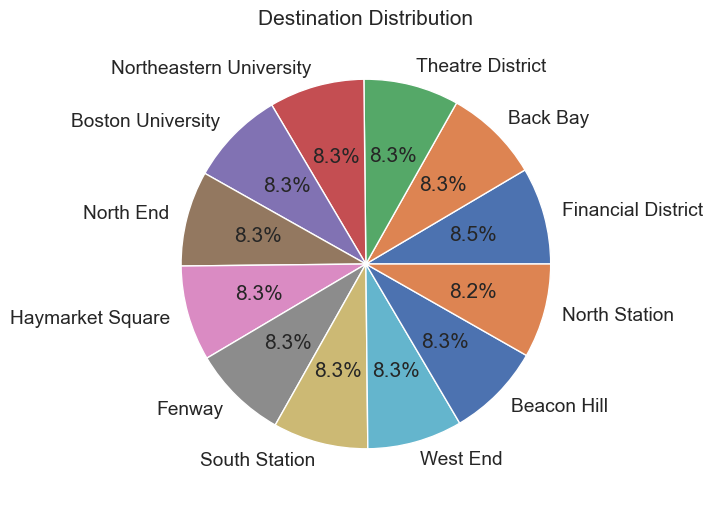

In [ ]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
plt.pie(data['destination'].value_counts(),labels=data['destination'].value_counts().index,autopct='%1.1f%%')
_title = 'Destination Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Cab Type

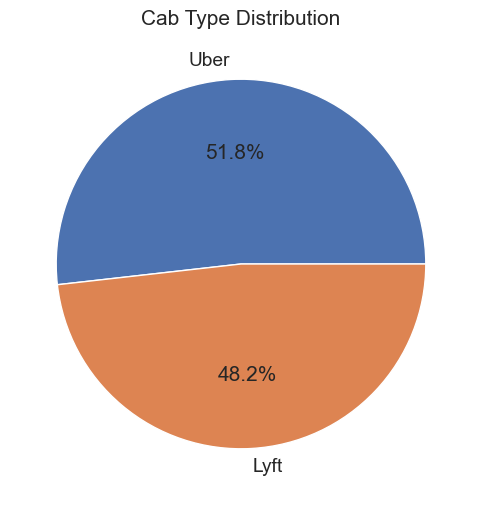

In [150]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
plt.pie(data['cab_type'].value_counts(),labels=data['cab_type'].value_counts().index,autopct='%1.1f%%')
_title = 'Cab Type Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Name

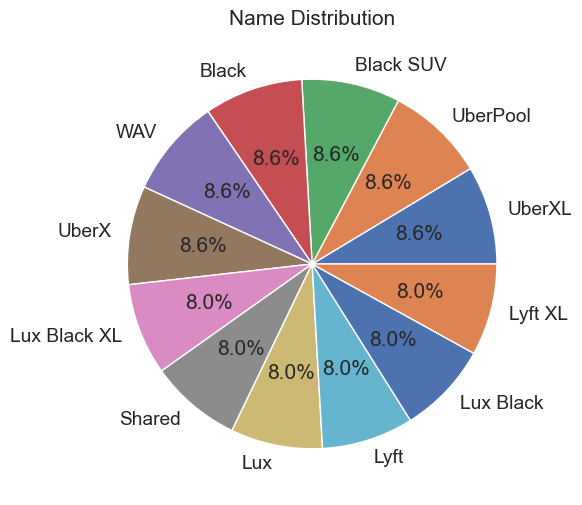

In [151]:
sns.set_style("whitegrid")
plot =plt.figure(figsize=(6,6))
plt.pie(data['name'].value_counts(),labels=data['name'].value_counts().index,autopct='%1.1f%%')
_title = 'Name Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [110]:
data.groupby(['cab_type','name']).size()


/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_2202/223650933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['cab_type','name']).size()


cab_type  name        
Lyft      Black               0
          Black SUV           0
          Lux             51211
          Lux Black       51205
          Lux Black XL    51215
          Lyft            51206
          Lyft XL         51200
          Shared          51215
          UberPool            0
          UberX               0
          UberXL              0
          WAV                 0
Uber      Black           55011
          Black SUV       55012
          Lux                 0
          Lux Black           0
          Lux Black XL        0
          Lyft                0
          Lyft XL             0
          Shared              0
          UberPool        55020
          UberX           54994
          UberXL          55030
          WAV             55003
dtype: int64

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_2202/3596592897.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['cab_type', 'name']).size()


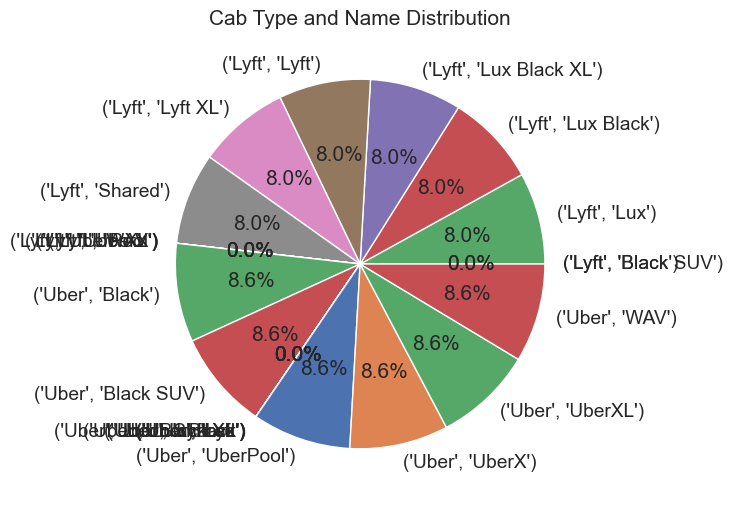

In [156]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
grouped_data = data.groupby(['cab_type', 'name']).size()
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
_title = 'Cab Type and Name Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Product id

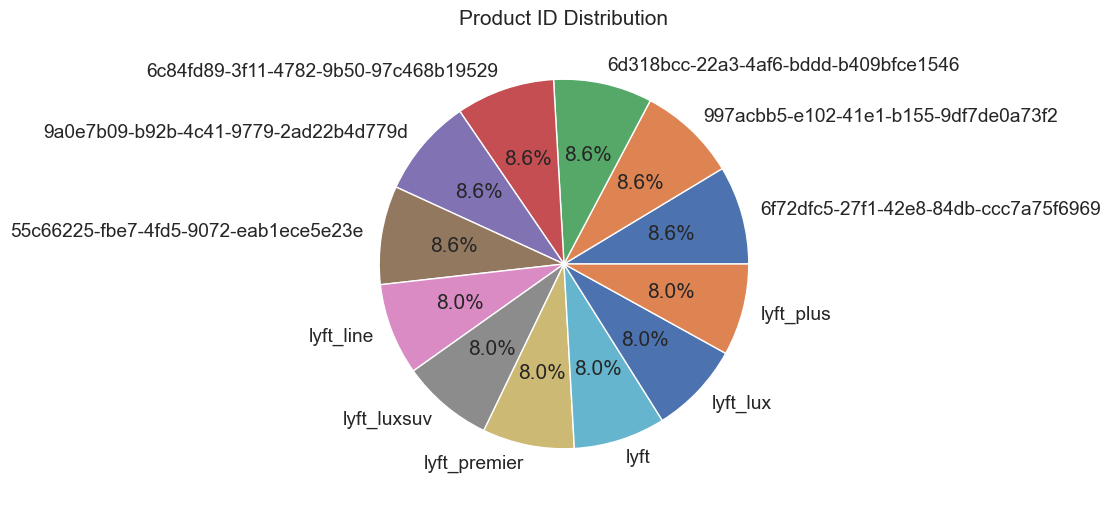

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['product_id'].value_counts(),labels=data['product_id'].value_counts().index,autopct='%1.1f%%')
_title = 'Product ID Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [113]:
data.groupby(['cab_type','name','product_id']).size()

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_2202/2675312199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['cab_type','name','product_id']).size()


cab_type  name   product_id                          
Lyft      Black  55c66225-fbe7-4fd5-9072-eab1ece5e23e    0
                 6c84fd89-3f11-4782-9b50-97c468b19529    0
                 6d318bcc-22a3-4af6-bddd-b409bfce1546    0
                 6f72dfc5-27f1-42e8-84db-ccc7a75f6969    0
                 997acbb5-e102-41e1-b155-9df7de0a73f2    0
                                                        ..
Uber      WAV    lyft_line                               0
                 lyft_lux                                0
                 lyft_luxsuv                             0
                 lyft_plus                               0
                 lyft_premier                            0
Length: 288, dtype: int64

We can get rid of product id column as it is the same as name column

In [114]:
data.drop(['product_id'],axis=1,inplace=True)

#### short summary 

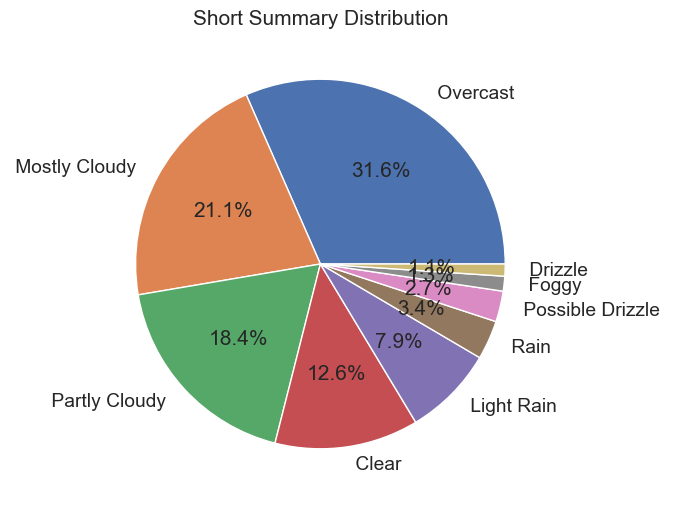

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['short_summary'].value_counts(),labels=data['short_summary'].value_counts().index,autopct='%1.1f%%')
_title = 'Short Summary Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### long summary 

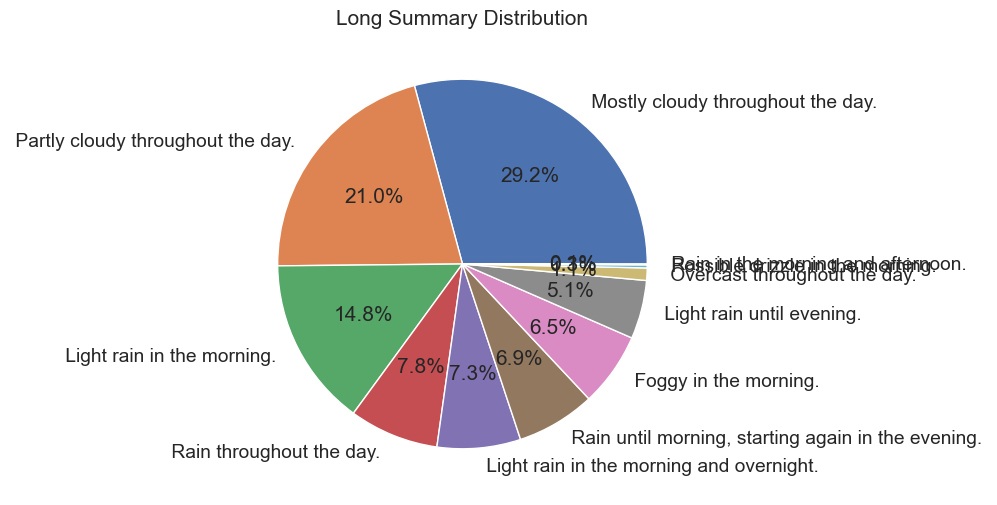

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['long_summary'].value_counts(),labels=data['long_summary'].value_counts().index,autopct='%1.1f%%')
_title = 'Long Summary Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### icon 

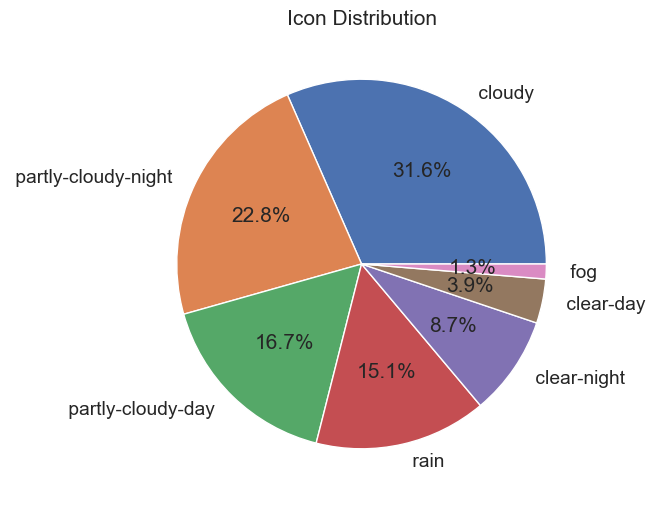

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['icon'].value_counts(),labels=data['icon'].value_counts().index,autopct='%1.1f%%')
_title = 'Icon Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

###  Selected Numerical Features

In [118]:
data.drop(columns=['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon']).dtypes[data.dtypes != 'object']
# we are not taking into account variables that we described earlier

timestamp                      datetime64[s]
hour                                   int64
day                                    int64
month                                  int64
price                                float64
distance                             float64
surge_multiplier                     float64
latitude                             float64
longitude                            float64
temperature                          float64
apparentTemperature                  float64
precipIntensity                      float64
precipProbability                    float64
humidity                             float64
windSpeed                            float64
windGust                             float64
windGustTime                   datetime64[s]
visibility                           float64
temperatureHigh                      float64
temperatureHighTime            datetime64[s]
temperatureLow                       float64
temperatureLowTime             datetime64[s]
apparentTe

In [119]:
data.drop(columns=['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon']).describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,637322,637322.000000,637322.000000,637322.000000,637322.000000,637322.000000,637322.000000,637322.000000,637322.000000,637322.000000,...,637322.000000,637322,637322.000000,637322,637322.000000,637322,637322.000000,637322,637322.000000,637322
mean,2018-12-05 21:38:27,11.618265,17.794103,11.586771,16.547041,2.189596,1.015083,42.338160,-71.066144,39.581913,...,0.037358,2018-12-05 21:09:15,33.455212,2018-12-05 20:30:05,45.260214,2018-12-05 22:04:44,29.728078,2018-12-05 22:16:58,41.996548,2018-12-05 22:16:23
min,2018-11-26 03:40:46,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,2018-11-25 16:00:00,15.630000,2018-11-25 05:00:00,33.510000,2018-11-25 14:00:00,11.810000,2018-11-25 09:00:00,28.950000,2018-11-25 23:00:00
25%,2018-11-28 22:28:45,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,2018-11-28 16:00:00,30.170000,2018-11-28 10:00:00,42.570000,2018-11-28 21:00:00,27.760000,2018-11-28 10:00:00,36.570000,2018-11-28 21:00:00
50%,2018-12-02 07:58:01,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,2018-12-02 17:00:00,34.240000,2018-12-02 05:00:00,44.660000,2018-12-02 22:00:00,30.130000,2018-12-02 10:00:00,40.950000,2018-12-02 22:00:00
75%,2018-12-14 22:45:11,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,2018-12-14 17:00:00,38.880000,2018-12-14 12:00:00,46.910000,2018-12-14 19:00:00,35.710000,2018-12-14 12:00:00,44.120000,2018-12-14 20:00:00
max,2018-12-18 19:15:11,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,2018-12-18 17:00:00,43.100000,2018-12-19 04:00:00,57.870000,2018-12-18 05:00:00,40.050000,2018-12-18 12:00:00,57.200000,2018-12-18 05:00:00
std,NaN,6.948551,9.982128,0.492414,9.325415,1.135439,0.095470,0.047857,0.020303,6.726288,...,0.055208,NaN,6.467002,NaN,5.645121,NaN,7.110754,NaN,6.936174,NaN


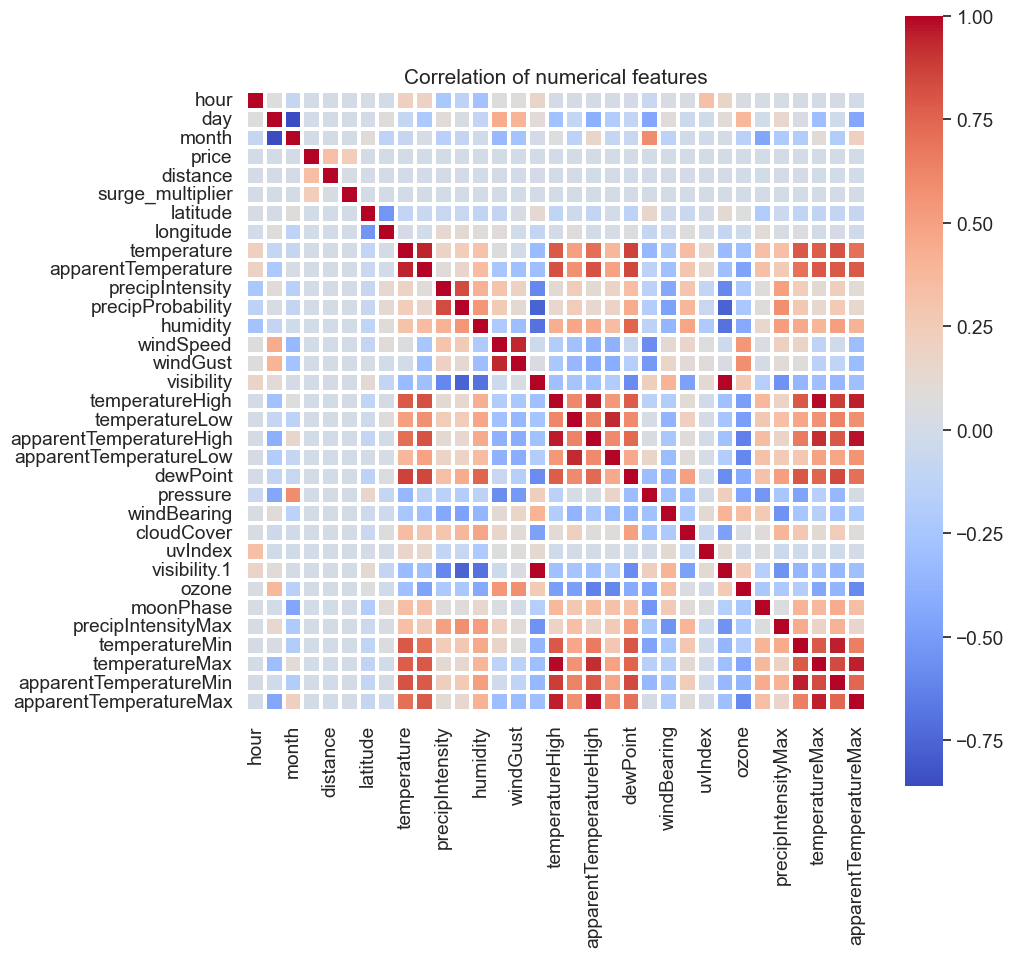

In [120]:
corr = data.drop(columns=['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon']).corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, 
    # annot=True,
    square=True, fmt=".2f", annot_kws={"size": 10},
    cmap = 'coolwarm'
)
plt.title("Correlation of numerical features")
plt.show()

#### Hour, month, day

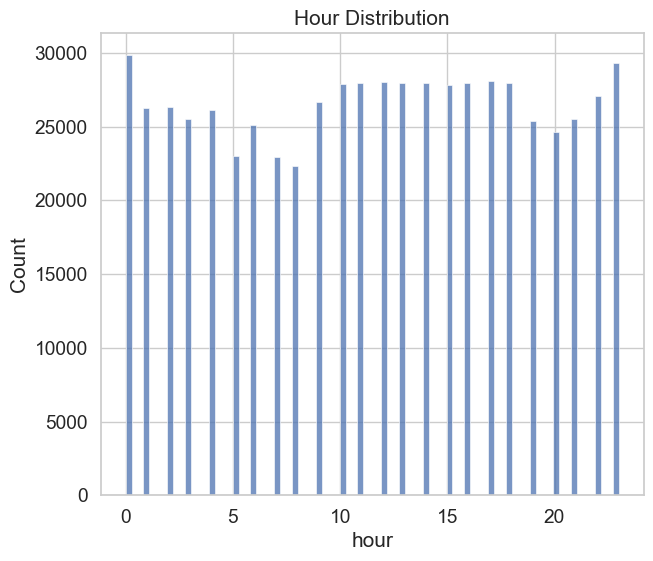

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "hour")
_title = 'Hour Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

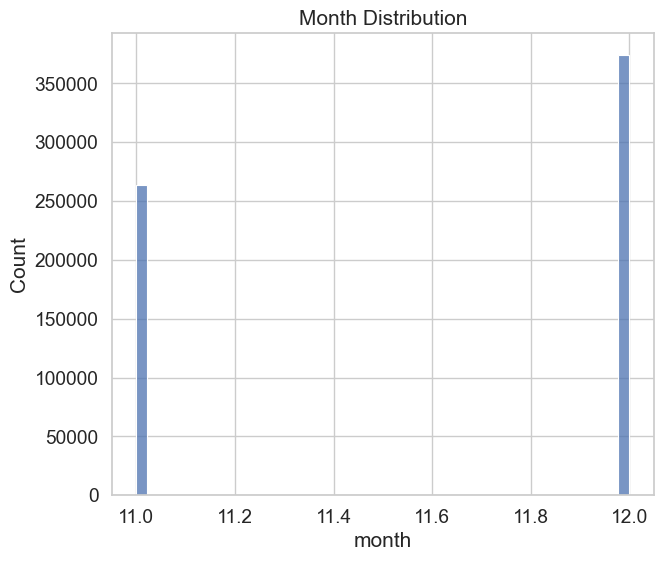

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x="month")
_title = 'Month Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

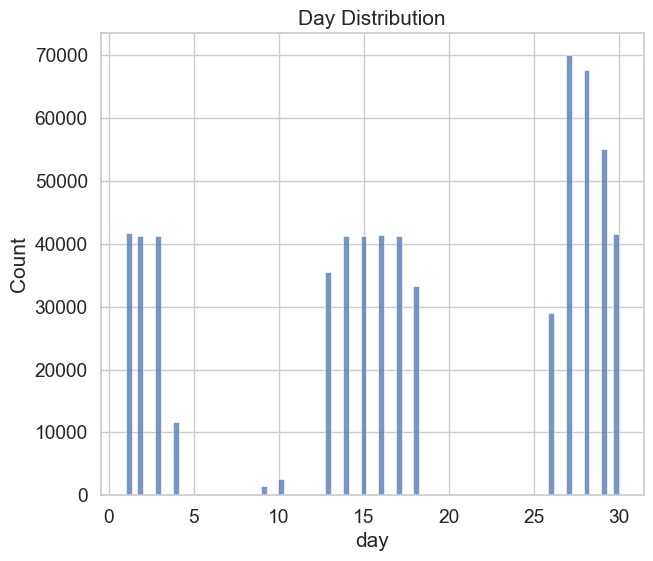

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "day")
_title = 'Day Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Surge Multiplier - Dynamic price growth rate.

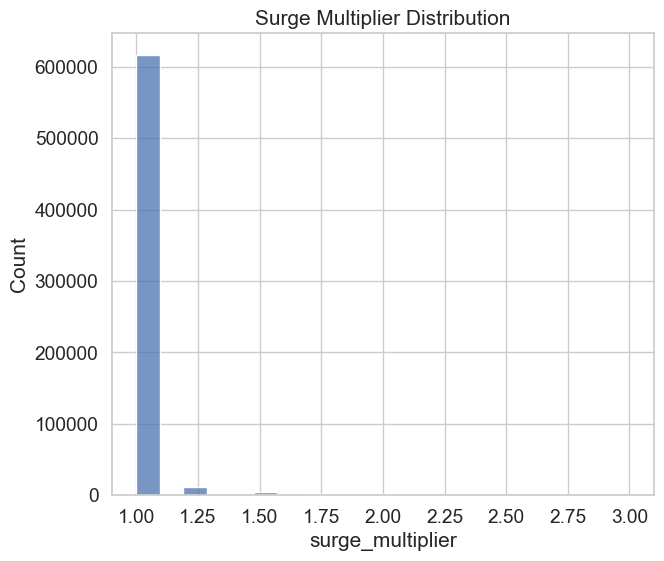

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "surge_multiplier")
_title = 'Surge Multiplier Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Distance

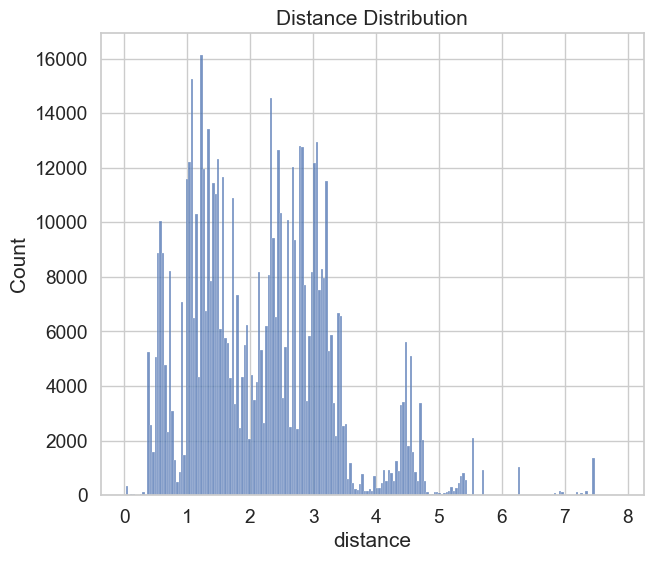

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "distance")
_title = 'Distance Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Temperature    

In [126]:
data['temperature'].describe()

count    637322.000000
mean         39.581913
std           6.726288
min          18.910000
25%          36.450000
50%          40.490000
75%          43.580000
max          57.220000
Name: temperature, dtype: float64

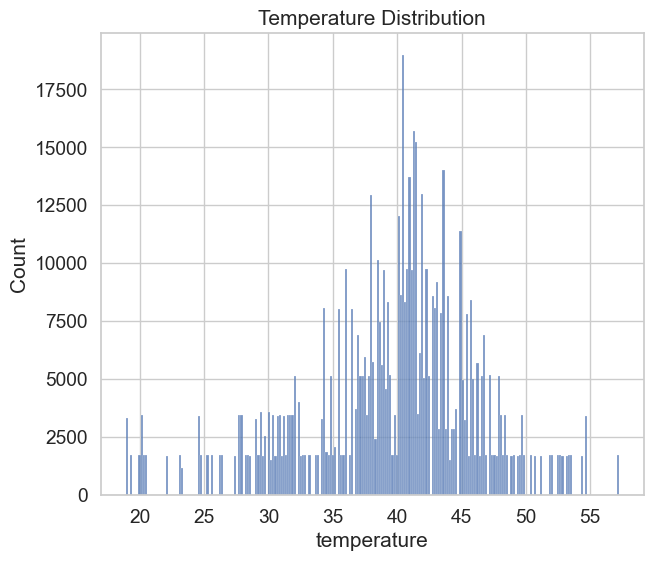

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "temperature")
_title = 'Temperature Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### The intensity of precipitation (e.g. rain or snow).

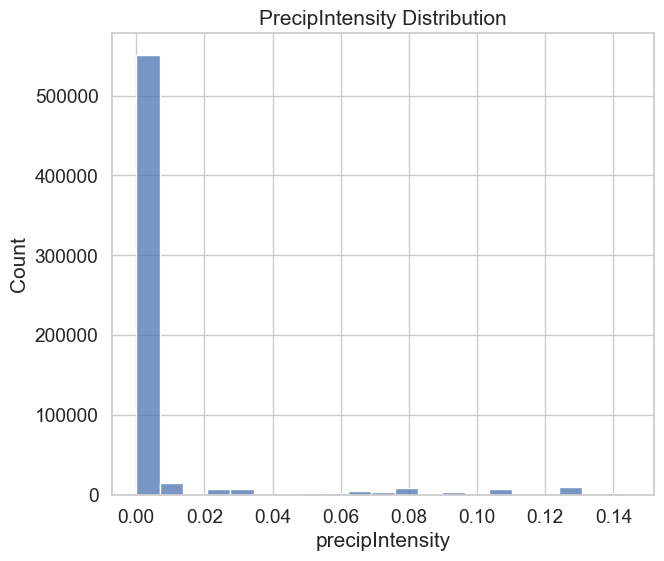

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "precipIntensity")
_title = 'PrecipIntensity Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Humidity

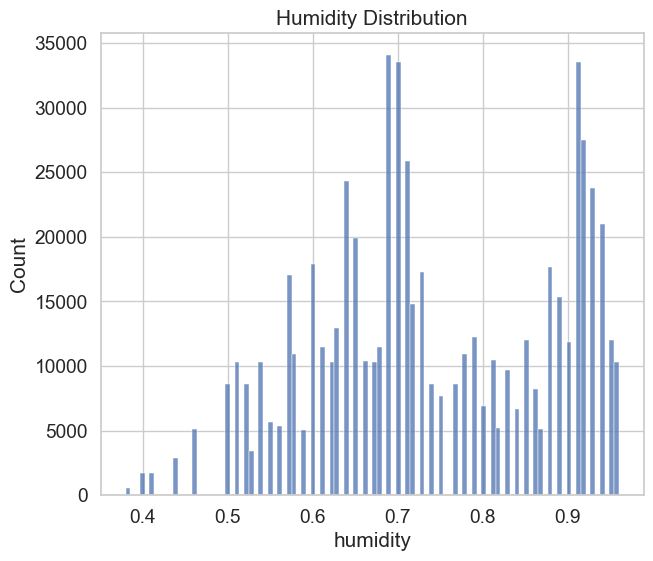

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "humidity")
_title = 'Humidity Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### UV index

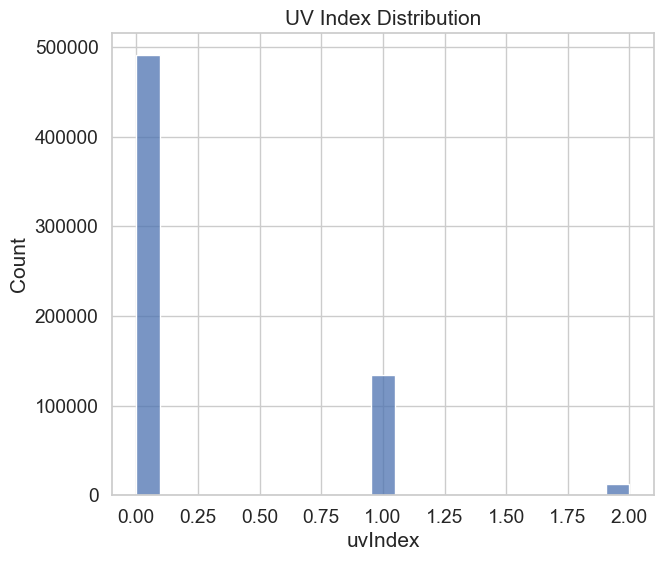

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "uvIndex")
_title = 'UV Index Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Visibility - Visibility in distance units

In [131]:
data['visibility'].describe()

count    637322.000000
mean          8.469382
std           2.601715
min           0.717000
25%           8.432000
50%           9.880000
75%           9.996000
max          10.000000
Name: visibility, dtype: float64

In [132]:
data['visibility.1'].describe()

count    637322.000000
mean          8.469382
std           2.601715
min           0.717000
25%           8.432000
50%           9.880000
75%           9.996000
max          10.000000
Name: visibility.1, dtype: float64

In [133]:
data['visibility'].equals(data['visibility.1'])

True

We can get rid of column visibility.1 as it is a copy of column visibilty 

In [134]:
data.drop(columns=['visibility.1'],inplace=True)

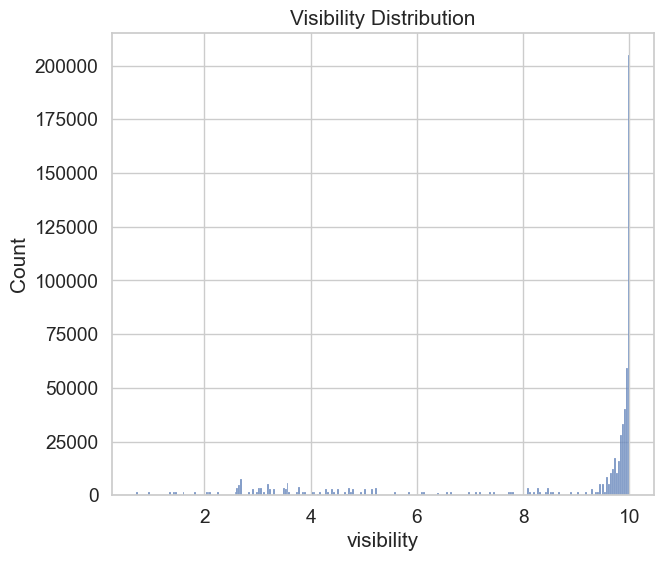

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))
sns.histplot(data, x = "visibility")
_title = 'Visibility Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

### Combined analysis of categorical and numerical variables

#### Price and distance relationship

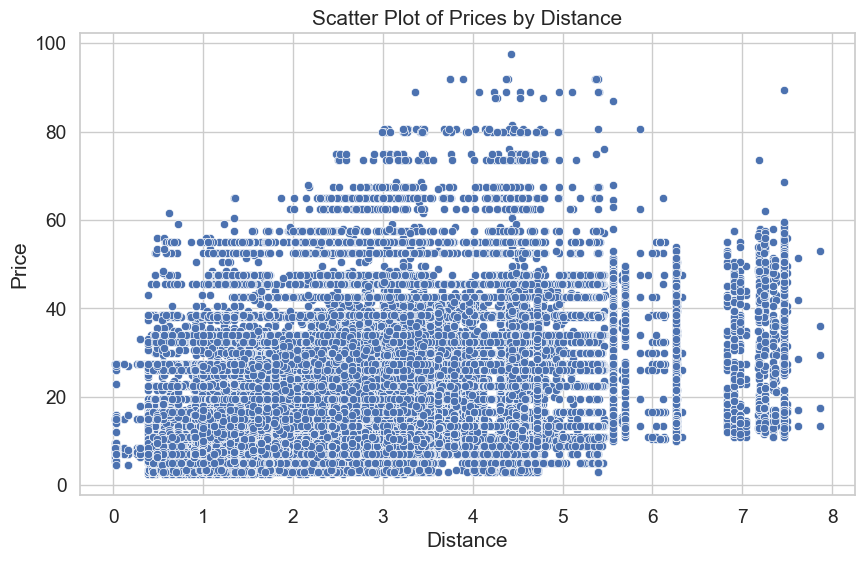

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=data)
_title = 'Scatter Plot of Prices by Distance'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

#### Price and Cab Type relationship

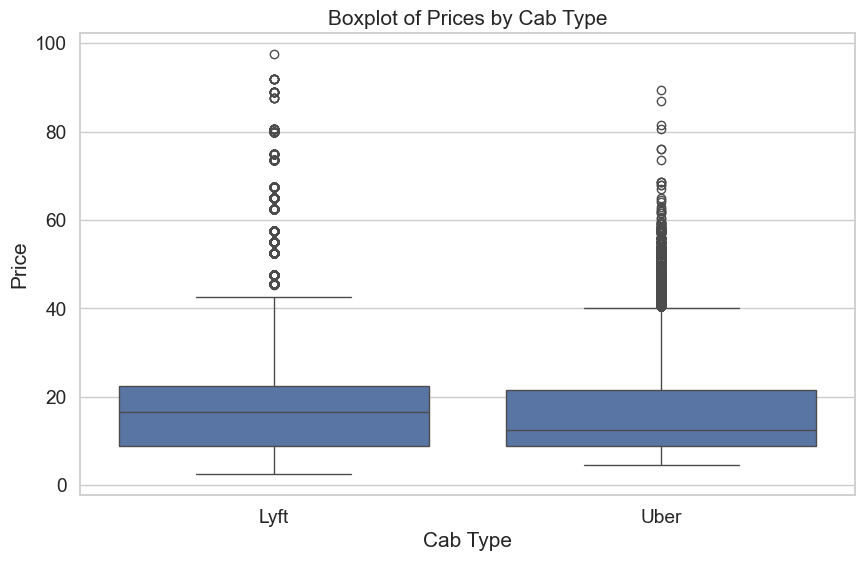

In [ ]:
# Boxplot of prices by cab type
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x='cab_type', y='price', data=data)
_title = 'Boxplot of Prices by Cab Type'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Cab Type')
plt.ylabel('Price')
#fig = plot.get_figure()
#fig.savefig('eda_output/boxplot.png')
plt.show()

#### Price and Temperture relationship

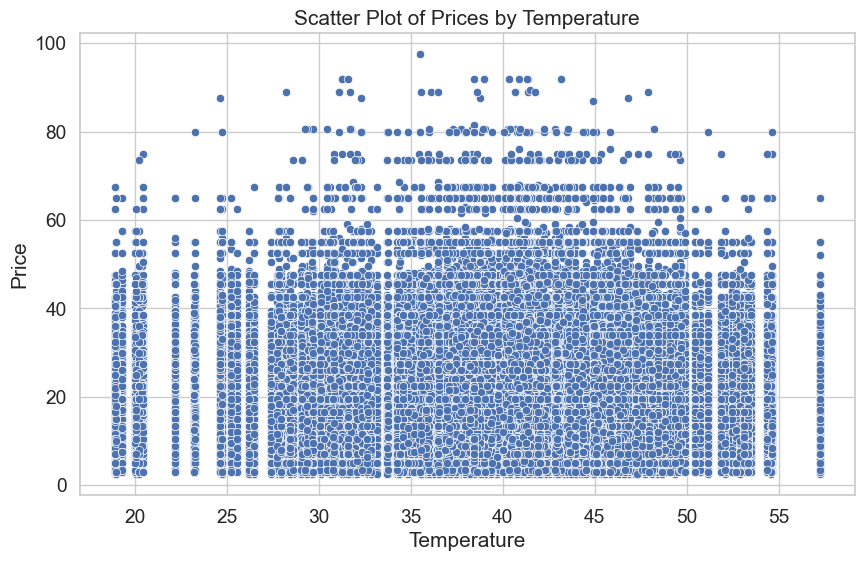

In [138]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'font_scale': '1.6'})
sns.scatterplot(x='temperature', y='price', data=data)
_title = 'Scatter Plot of Prices by Temperature'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Temperature')
plt.ylabel('Price')
plt.show()

#### Price and Hour, Day and Month  relationship

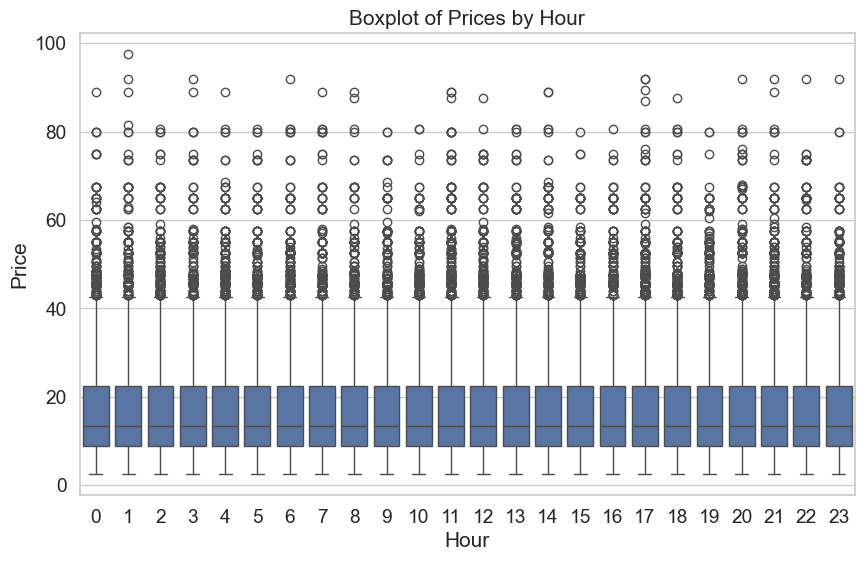

In [139]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'font_scale': '1.6'})
sns.boxplot(x='hour', y='price', data=data)
_title = 'Boxplot of Prices by Hour'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()

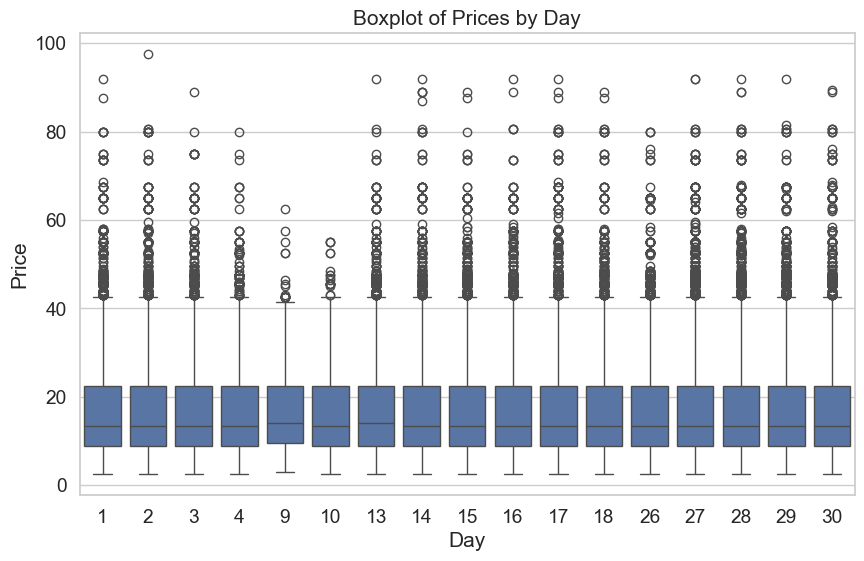

In [140]:

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'font_scale': '1.6'})
sns.boxplot(x='day', y='price', data=data)
_title = 'Boxplot of Prices by Day'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

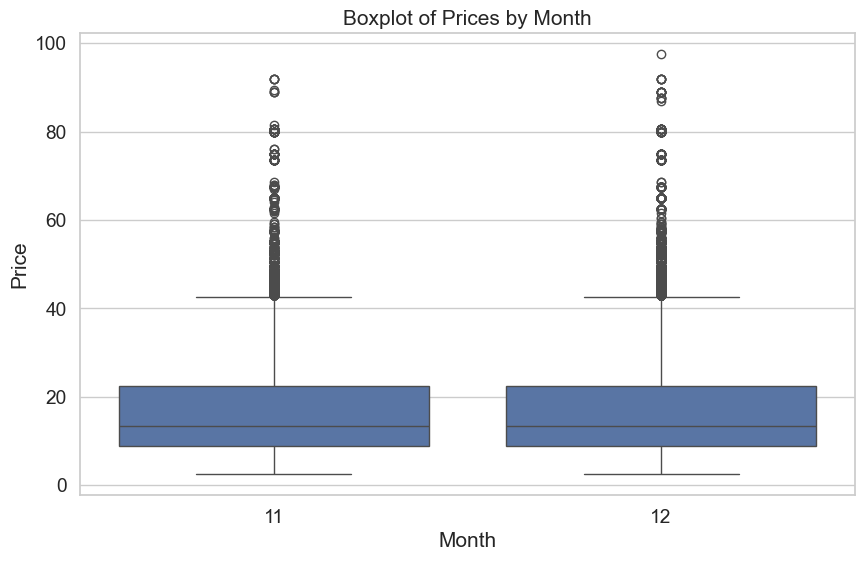

In [149]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'font_scale': '1.6'})
sns.boxplot(x='month', y='price', data=data)
_title = 'Boxplot of Prices by Month'
plt.title(_title)
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

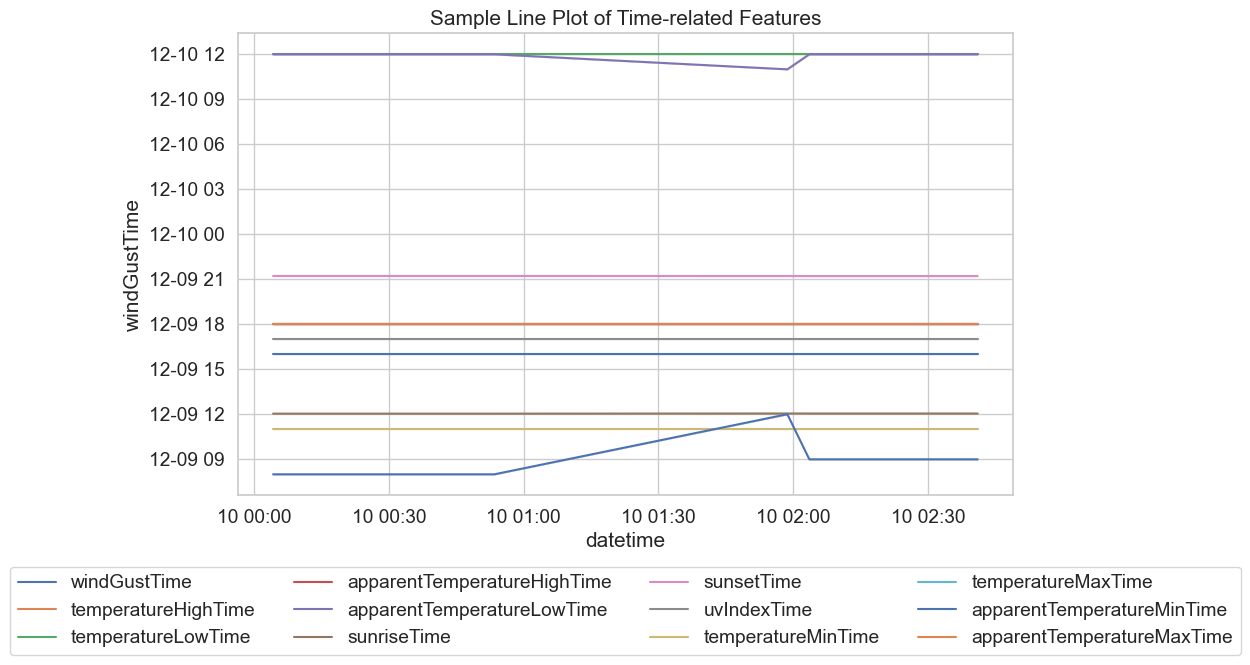

In [148]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'font_scale': 1.6})

_title = 'Sample Line Plot of Time-related Features'
for time_col in [col for col in data.columns if 'Time' in col]:
    day = 10
    specific_day_data = data[data['datetime'].dt.date == data['datetime'].dt.date.sort_values().unique()[day]]
    sns.lineplot(data=specific_day_data[['datetime', time_col]], x='datetime', y=time_col, label=time_col)
plt.title(_title)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=4, frameon=True)
plt.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()


# Save data

In [146]:
data.to_pickle("../data/outputs/1.eda/rideshare_preprocessed.pkl")